# Mechanical properties of low alloy steels

```
Name: Naman Tamrakar
Roll no.: 193152
Department: Mechanical Engineering
```

## Summary

The mechanical property of steel is decided by doing mutiple test on it using different methods. 
Since the mechanical property of alloy steel depends on elements composition, temprature and dimension 
change. 

So using a machine learning one can easily predict the mechanical property using these paramaters.
The aim of this machine learning model is to predict the mechanical property of Steel 
Alloy by using element composition, temprature, tensile strengh, yeild strength and elogation.


As this problem is a **classification problem** so this model can be trained using 
**Logistic Classification**, **Support vector classification**, **Randome forest classification** and
**Decision Tree classification**.

## Dataset

The dataset contains columns having various elements composition, temprature, mechanical property of Stell alloy.
The **Alloy code** is a string unique to each alloy. The model is expected to predict the alloy code 
based on above paramaters.

>Source: https://www.kaggle.com/datasets/rohannemade/mechanical-properties-of-low-alloy-steels

## Data Preprocessing

Since **Alloy code** is string value so it is converted to numerical lable using **Label Encoding**.

It is observed that the performance of model is very bad when train without **standarizing dataset** 
i.e. 0.9% So standarize the data by removing mean and scaling to unit variance using **StandardScaler**.

## Model Training

### 1. Logisitic Regression

When trained model with 80% training data and tested with 20% data, An accuracy of **98.4%** is achived 
which can further improved by changing some paramters like *regularization strength*.

### 2. Support Vector Classification

When train using default kernel i.e, `rbf`, It gives an accuracy of *40%*. To improve the accuracy 
try with different kernels.

The `linear` kernel found to gives better accuracy 
of **99%** which can futher improved by changing *regularization strength (C)*.


## Conclusion

So one can easily predict the mechanical property of the steel alloy by using this model very accurately.

## Code

In [41]:
import pandas as pd # for data handling

from sklearn.model_selection import train_test_split # for splitting data
from sklearn.svm import SVC # SVM classifier
from sklearn.linear_model import LogisticRegression # logisitic classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline # creating pipeling
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt # for plotting data
import seaborn as sns

In [42]:
# Importing data from CSV file
# which contains nearly 900+ data points

df = pd.read_csv("steel-alloy.csv")
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


### Data analysing

In [43]:
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


In [44]:
# check if there is any data missing row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

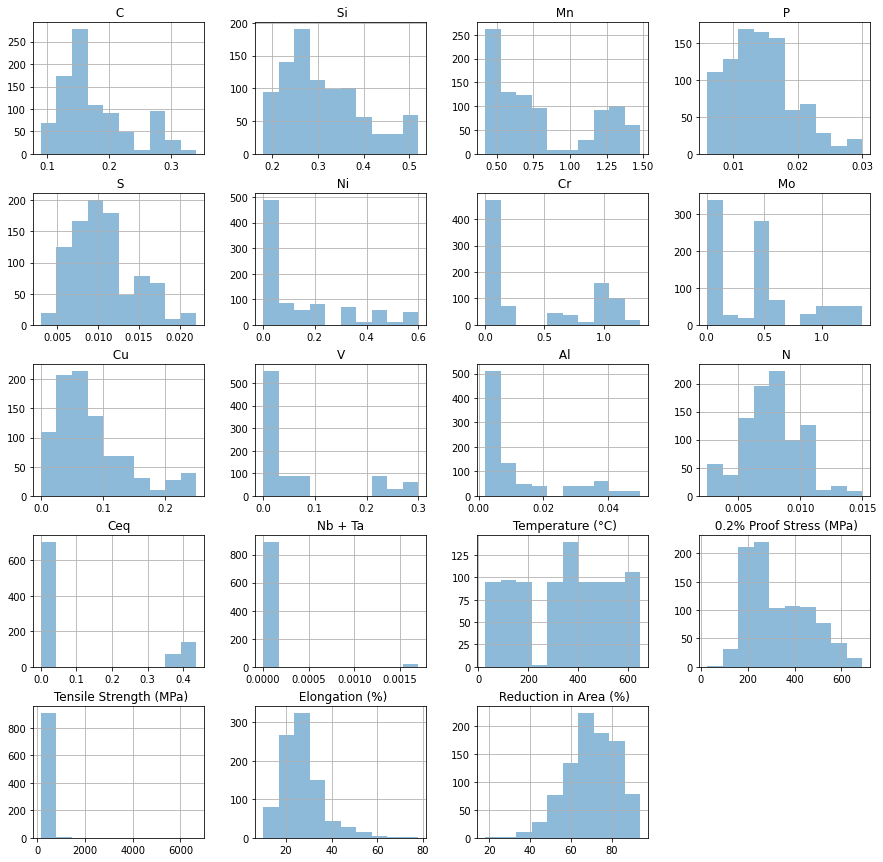

In [45]:
# Distribution of various data

df.hist(alpha=0.5, figsize=(15, 15))
plt.show()

<AxesSubplot:>

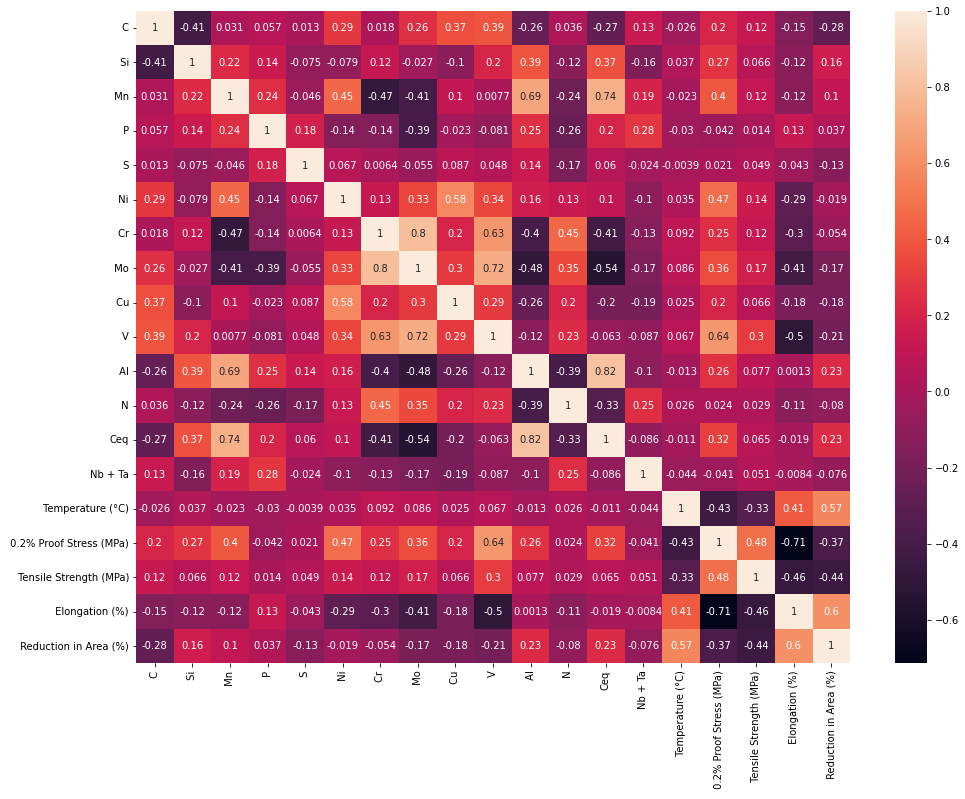

In [46]:
# Let's plot a heatmap to get the idea of correlation
# b/w mutiple variables

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)

In [47]:
# check no of alloy code available

df["Alloy code"].describe()

count     915
unique     95
top       CCB
freq       11
Name: Alloy code, dtype: object

In [48]:
# Label encode Alloy column
encoder = LabelEncoder()
df["Alloy code"] = encoder.fit_transform(df["Alloy code"])

df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,57,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,57,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,57,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,57,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,57,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [49]:
X = df.drop(columns=["Alloy code"])
y = df["Alloy code"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training using Logistic Regression

In [50]:
# Check model accuracy without standarizing data

# create model pipeline with standarizing data
log_model = Pipeline([
    ("logisitic", LogisticRegression())
])

# Train model using training data
log_model.fit(X_train, y_train)

# Check accuracy of model
log_model.score(X_test, y_test)

c:\Users\Naman Tamrakar\Desktop\ML-CCPD\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.00546448087431694

In [51]:
# create model pipeline with standarizing data
log_model = Pipeline([
    ("scaler", StandardScaler()), # standarising the data
    ("logisitic", LogisticRegression(max_iter=3000, C=10)) # twiking param to get better results
])

# Train model using training data
log_model.fit(X_train, y_train)

# Check accuracy of model
log_model.score(X_test, y_test)

0.9836065573770492

Text(69.0, 0.5, 'Predicted')

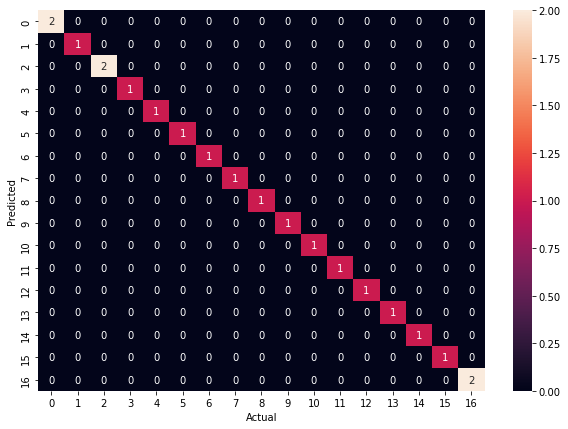

In [52]:
y_pred = log_model.predict(X_test)

# plot only initial 20 results
matrix = confusion_matrix(y_test[:20], y_pred[:20])

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Model training using Support vector maching classification

In [53]:
# Check model accuracy with default kernel

# create model pipeline with standarizing data
svc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

# fitting model using training data
svc_model.fit(X_train, y_train)

# Check model accuracy
svc_model.score(X_test, y_test)

0.3989071038251366

In [54]:
# create model pipeline with standarizing data
svc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])

# fitting model using training data
svc_model.fit(X_train, y_train)

# Check model accuracy
svc_model.score(X_test, y_test)

0.994535519125683

Text(69.0, 0.5, 'Predicted')

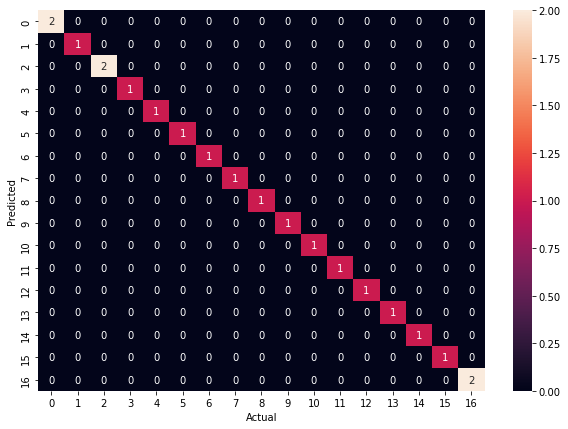

In [55]:
y_pred = svc_model.predict(X_test)

matrix = confusion_matrix(y_test[:20], y_pred[:20])

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")